### Analyzing the Stroop Effect
(1) What is the independent variable? What is the dependent variable?

Independent variable is whether subject is performing the congruent or incongruent word task. The dependent variable is the amount of time (seconds) to complete the task.

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

Null hypothesis is that the congruent and incongruent tasks will take the same amount of time.  In notation, that would be:

$ H_0: time_{congruent} = time_{incongruent} $ <br> 

The alternative hypothesis is that the congruent or incongruent task takes a longer amount of time (from eyeballing the data), I would hypothesize that the incongruent times are greater. In notation that would be:

$ H_1: time_{congruent} > time_{incongruent} $ <br> 
OR  
$ H_1: time_{incongruent} > time_{congruent} $ <br>

For the statistical test, I would propose using a t-test (specifically a **paired two-tailed t-test**) because we are comparing the means of two different groups, the sample size is  small, we have no further population data, and because the tests were taken by the same individuals at the same time. 

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [258]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import scipy.stats as stats

In [259]:
# # Import Stroop effect data set
df = pd.read_csv('stroopdata.csv')
# df['Subject #'] = np.arange(len(df))
df.insert(0, 'Subject #', range(1, 1 + len(df)))
df

,Subject #,Congruent,Incongruent
0,1,12.079,19.278
1,2,16.791,18.741
2,3,9.564,21.214
3,4,8.630,15.687
4,5,14.669,22.803
5,6,12.238,20.878
6,7,14.692,24.572
7,8,8.987,17.394
8,9,9.401,20.762
9,10,14.480,26.282


In [260]:
# info for the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
Subject #      24 non-null int64
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2), int64(1)
memory usage: 656.0 bytes


In [261]:
# Descriptive statistics, including at least one measure of centrality and one measure of \
# variability, have been computed for the dataset’s groups.
df['Congruent'].mean()

14.051125000000004

In [262]:
df['Congruent'].std()

3.559357957645195

In [263]:
df['Incongruent'].mean()

22.01591666666667

In [264]:
df['Incongruent'].std()

4.797057122469138

Mean and standard deviation computed for Congruent and Incongruent groups (above). Would appear to support the null hypothesis.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

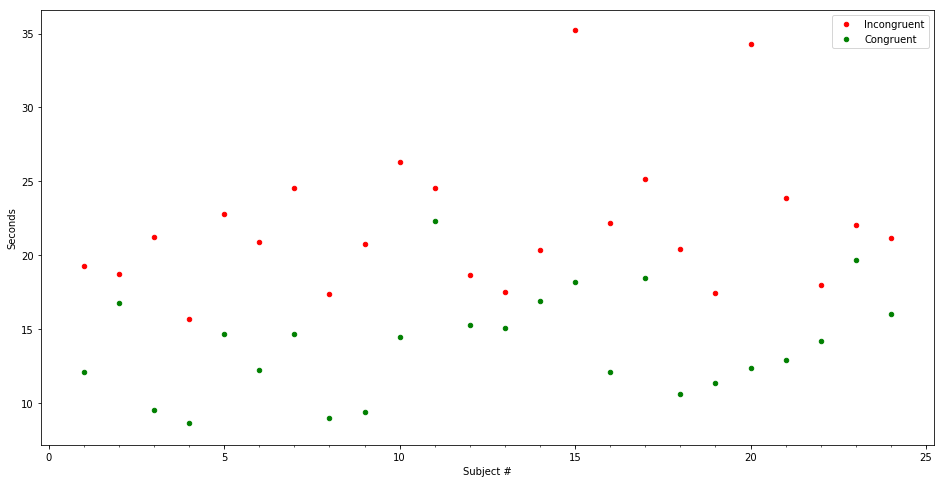

In [265]:
# Build the visualizations here
# Here is a scatter plot of the Independent Variables (Congruent & Incongruent) vs. time-to-complete (in seconds)
ax = df.plot(kind='scatter', x='Subject #', y='Incongruent', color='r', label="Incongruent",figsize=(16,8))    
df.plot(kind='scatter', x='Subject #', y='Congruent', color='g', label="Congruent",ax=ax)
ax.set_xlabel("Subject #")
ax.set_ylabel("Seconds")
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.show();

In [269]:
# adding a column for the difference in times to complete Incongruent vs. Congruent Tasks
df['Difference'] = df['Incongruent']-df['Congruent']
df

,Subject #,Congruent,Incongruent,Difference
0,1,12.079,19.278,7.199
1,2,16.791,18.741,1.950
2,3,9.564,21.214,11.650
3,4,8.630,15.687,7.057
4,5,14.669,22.803,8.134
5,6,12.238,20.878,8.640
6,7,14.692,24.572,9.880
7,8,8.987,17.394,8.407
8,9,9.401,20.762,11.361
9,10,14.480,26.282,11.802


In [250]:
# the mean of the differences between the two groups - will help us to complete the t test (below)
df['Difference'].mean()

7.964791666666667

In [267]:
# the std of the differences between the two groups - will also help us to complete the t test (below)
df['Difference'].std()

4.864826910359056

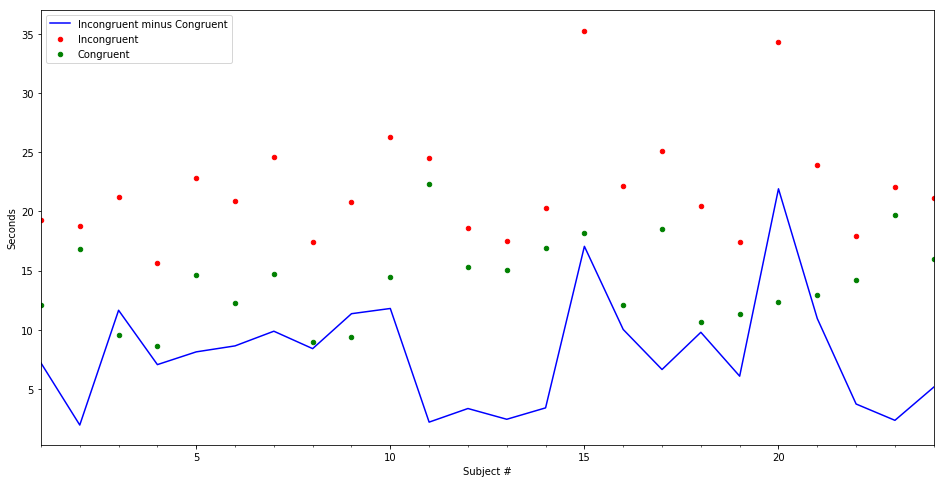

In [268]:
# this plot layers in the line graph of the difference between the two figures with the above scatterplot
ax = df.plot(kind='line', x='Subject #', y='Difference', color='b', label="Incongruent minus Congruent",figsize=(16,8))
df.plot(kind='scatter', x='Subject #', y='Incongruent', color='r', label="Incongruent",ax=ax)    
df.plot(kind='scatter', x='Subject #', y='Congruent', color='g', label="Congruent",ax=ax)
ax.set_xlabel("Subject #")
ax.set_ylabel("Seconds")
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.show();

In the observed data, it is pretty clear that the Incongruent task takes longer than the Congruent one (this is true in each and every data point).  The difference in time required for the task varies from approximately two seconds up to more than twenty seconds (outliers).

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [254]:
# Perform the statistical test here
# am indebted to the following Medium publication for the steps to create this test
# Amulya Aankul "T-test using Python and Numpy"
# https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f

## Calculate the t-statistic
t = (df['Difference'].mean())/(df['Difference'].std()/np.sqrt(n))

## Compare with the critical t-value
#Degrees of freedom
degfreedom = len(df) - 1

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=freedomdeg)

print("t = " + str(t))
print("p = " + str(2*p))

23
t = 8.02070694411
p = 2.75679035155e-10


In [257]:
## Cross Checking with the scipy function ttest_rel 
t2, p2 = stats.ttest_rel(df['Incongruent'].values,df['Congruent'].values)
print("t = " + str(t2))
print("p = " + str(p2))


t = 8.02070694411
p = 4.10300058571e-08


For this t test we **reject the null hypothesis** and conclude that the difference between the Incongruent and the Congruent groups are statistically significant.  There are three relevant statistics:
- the t-statistic is high - 8.02 which well above 2 which itself is an indicator of low probability that the two sets of numbers are samples from the  same overall population.
- the t-statistic is also higher than the critical t-value of 2.69 for the alpha of .05 and the degrees of freedom (23). Note that this table can be found in https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f and as previously noted, I learned this technique from that blog post.
- the p-values - both as compared with the t and also calculated by the SciPy function are considerably less than the alpha threshold of .05.
Since all three of these statistics point in the same direction, we are very confident about rejecting the null hyphothesis.